In [1]:
# Importing required libraries:

import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
import skfuzzy as fuzz

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Iris dataset:
iris = datasets.load_iris()
data = iris.data

### K-means Clustering Algorithm:

K-Means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct, non-overlapping groups or clusters. These clusters are defined in such a way that data points within the same cluster are more similar to each other than they are to data points in other clusters. K-Means is widely used in various fields for tasks such as data compression, image segmentation, and customer segmentation.

Here's a brief introduction to the K-Means clustering algorithm:

1. **Initialization**:
   - The algorithm starts by selecting K initial cluster centroids (K is a user-defined parameter). These centroids can be randomly chosen from the data points or by using some other initialization techniques like K-Means++.

2. **Assignment Step**:
   - Each data point in the dataset is assigned to the nearest centroid based on a distance metric, typically Euclidean distance.
   - Data points are grouped into clusters based on their proximity to the centroids. Each cluster contains data points that are closer to its centroid than to any other centroid.

3. **Update Step**:
   - After the assignment step, the algorithm updates the centroids of each cluster by computing the mean (average) of all data points assigned to that cluster.
   - The updated centroids become the new cluster centers.

4. **Iteration**:
   - Steps 2 and 3 are repeated iteratively until one of the stopping criteria is met. Common stopping criteria include a maximum number of iterations or when the centroids no longer change significantly between iterations.

5. **Final Clusters**:
   - Once the algorithm converges (i.e., the centroids no longer change significantly), the final clusters are obtained.

Key characteristics and considerations of the K-Means algorithm:

- K-Means is a "hard" clustering algorithm, meaning that each data point belongs to exactly one cluster.
- The number of clusters, K, must be specified by the user in advance, which can be a challenge.
- It is sensitive to the initial placement of centroids, so multiple runs with different initializations may yield different results.
- K-Means aims to minimize the within-cluster variance, making clusters compact and well-separated.
- It has a time complexity that depends on the number of data points, clusters, and the number of iterations, making it suitable for large datasets but sensitive to the choice of K.
- K-Means is widely used but may not perform well on datasets with irregularly shaped or overlapping clusters.

Overall, K-Means clustering is a versatile and efficient algorithm for data segmentation and grouping, and it serves as a fundamental building block for various clustering techniques and applications.

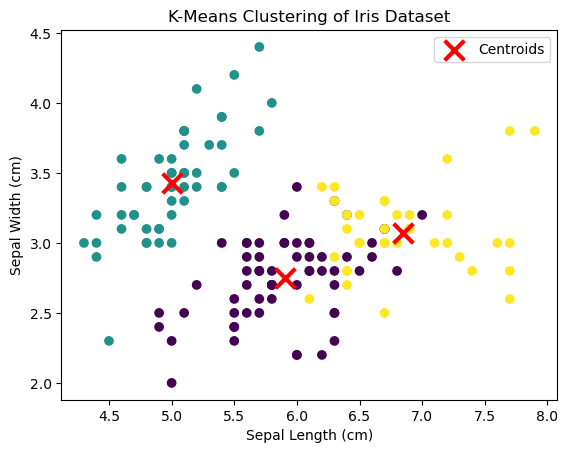

K-Means Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [3]:
# Define the number of clusters:
n_clusters = 3

# Initialize the K-Means model:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the K-Means model to the data:
kmeans.fit(data)

# Get cluster labels and cluster centers:
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# Visualize the results (for two features, e.g., Sepal Length and Sepal Width):
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()

# Print the cluster labels:
print("K-Means Labels:")
print(kmeans_labels)


In [4]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(data, kmeans_labels)

print("Silhouette Score for K-Means:", silhouette_avg)

Silhouette Score for K-Means: 0.5528190123564095


### Fuzzy C-Means Clustering (FCM) Algorithm:

Fuzzy C-Means (FCM) clustering is a soft clustering algorithm, which is an extension of the K-Means algorithm. Unlike K-Means, where each data point belongs to only one cluster (hard clustering), FCM allows each data point to belong to multiple clusters with varying degrees of membership (soft clustering). FCM is particularly useful when data points exhibit ambiguity or uncertainty about their cluster assignments.

Here's a brief introduction to the Fuzzy C-Means clustering algorithm:

1. **Initialization**:
   - Like K-Means, FCM begins by selecting the number of clusters, K, and initializing K cluster centroids. These centroids can be initialized randomly or using techniques like K-Means++.

2. **Membership Degree Assignment**:
   - In FCM, each data point is assigned a membership degree for each cluster, representing the degree to which the data point belongs to that cluster. These membership degrees are real numbers between 0 and 1.
   - The membership degrees are computed based on the Euclidean distance between each data point and each cluster centroid. Data points are allowed to have partial memberships to multiple clusters.
   - The membership degrees are updated iteratively in each step of the algorithm.

3. **Update Step**:
   - After computing membership degrees, FCM updates the cluster centroids by taking a weighted average of the data points, where the weights are the membership degrees.
   - The updated centroids are computed using the following formula:
     ![FCM Update Formula](https://latex.codecogs.com/svg.latex?C_j%20%3D%20%5Cfrac%7B%5Csum%20%28%5Cmu_%7Bij%7D%5E%7Bm%7D%20%5Ccdot%20x_i%29%7D%7B%5Csum%20%5Cmu_%7Bij%7D%5E%7Bm%7D%7D)
     Where:
     - \(C_j\) is the updated centroid of cluster j.
     - \(x_i\) is the i-th data point.
     - \(\mu_{ij}^m\) is the membership degree of data point \(x_i\) to cluster \(j\).
     - \(m\) is a hyperparameter called the fuzziness exponent, typically set to 2.

4. **Iteration**:
   - Steps 2 and 3 are repeated iteratively until convergence. Convergence is typically determined based on a predefined stopping criterion, such as a maximum number of iterations or when the change in membership degrees becomes small.

5. **Final Memberships and Clusters**:
   - Once the algorithm converges, the final membership degrees represent the degree of membership of each data point to each cluster.
   - Data points can be assigned to clusters based on their highest membership degree.

Key characteristics and considerations of the Fuzzy C-Means algorithm:

- FCM is a "soft" clustering algorithm, allowing data points to belong to multiple clusters with varying degrees of membership.
- The fuzziness exponent (\(m\)) controls the degree of fuzziness in the memberships. A higher \(m\) value makes the memberships more "fuzzy."
- FCM can handle data with uncertainty and ambiguity more effectively than hard clustering methods like K-Means.
- Like K-Means, FCM is sensitive to the choice of the number of clusters (\(K\)) and initialization of cluster centroids.
- FCM is used in various applications, including image segmentation, pattern recognition, and modeling complex datasets with overlapping clusters.

In summary, Fuzzy C-Means clustering is a valuable algorithm for handling data with uncertain cluster assignments, providing a flexible and probabilistic approach to clustering analysis.

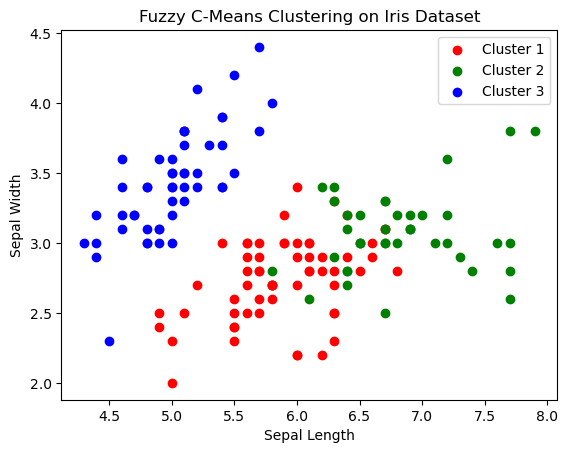

In [5]:
# Number of clusters:
n_clusters = 3

# Fuzzy c-means algorithm:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, 2, error=0.005, maxiter=1000)

# Assign each data point to the cluster with the highest membership value:
cluster_membership = np.argmax(u, axis=0)

# Plotting the results:
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for j in range(n_clusters):
    ax.scatter(data[cluster_membership == j, 0], data[cluster_membership == j, 1],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Fuzzy C-Means Clustering on Iris Dataset')
plt.show()

In [6]:
cluster_membership = np.argmax(u, axis=0)
# Calculate the silhouette score
silhouette_avg = silhouette_score(data, cluster_membership)

print("Silhouette Score for Fuzzy C-Means:", silhouette_avg)

Silhouette Score for Fuzzy C-Means: 0.549517512647162


### Comparision of Results:

Now, let's compare the results. Since the Iris dataset has ground truth labels (the actual species of each sample), we can use metrics like Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), or Silhouette Score to evaluate the clustering results. 

The code below calculates the Adjusted Rand Index (ARI) to measure the similarity between the true labels and the clustering results obtained by both K-Means and Fuzzy C-Means.
Finally, compare the ARI scores to see which algorithm performed better in clustering the Iris dataset. A higher ARI indicates better clustering quality.

In [7]:
from sklearn.metrics import adjusted_rand_score

true_labels = iris.target

ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
ari_fcm = adjusted_rand_score(true_labels, cluster_membership)

print("\nAdjusted Rand Index (ARI) - K-Means:", ari_kmeans)
print("Adjusted Rand Index (ARI) - Fuzzy C-Means:", ari_fcm)



Adjusted Rand Index (ARI) - K-Means: 0.7302382722834697
Adjusted Rand Index (ARI) - Fuzzy C-Means: 0.7294203486015404


The ARI for the k-means clustering algorithm is higher than the ARI for the fuzzy c-means clustering algorithm, indicating that the fuzzy c-means algorithm performs better at clustering for the Iris dataset.